# Import Libraries

In [1]:
import sqlite3 as lite
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools


# Get Data From Sqlite Database 

**This step is been done in these steps:**
* connect to `lahman2014` database.


In [2]:
connection = lite.connect('lahman2014.sqlite')


# PART ONE: Data Wrangling

**This step is been done in these steps:**
* get data needed from the (`Teams`, `Salaries`) Table.
* merging these two tables using an inner join so I could get all teams ids in **`Salaries Table`** and also that team ids found in **`Teams Table`** that cause avoiding NAN values.
* calculate **Total Payroll BY `summing the salaries for each player in the same team`.**
* calculate **Winning Percentage= `(number of wins/number of games * 100)`.**


In [3]:
TeamsQuery = "SELECT teamID, yearID, G, W FROM Teams"
TeamsTable = pd.read_sql(TeamsQuery, connection)

SalariesQuery = "SELECT teamID, yearID, salary FROM Salaries"
SalariesTable = pd.read_sql(SalariesQuery, connection)


In [4]:
TeamsTable.head()


,teamID,yearID,G,W
0,BS1,1871,31,20
1,CH1,1871,28,19
2,CL1,1871,29,10
3,FW1,1871,19,7
4,NY2,1871,33,16


In [5]:
SalariesTable.head()


,teamID,yearID,salary
0,ATL,1985,870000.0
1,ATL,1985,550000.0
2,ATL,1985,545000.0
3,ATL,1985,633333.0
4,ATL,1985,625000.0


In [6]:
PartOneTableQuery = "SELECT Teams.teamID, Teams.yearid, Teams.G, Teams.W, SUM(salary) AS 'TotalPayroll' ,(CAST(Teams.W AS FLOAT) / CAST(Teams.G AS FLOAT)*100 ) AS 'WinningPercentage' FROM Salaries INNER JOIN Teams on Teams.teamID = Salaries.teamID AND Teams.yearid = Salaries.yearid GROUP BY Teams.yearid , Teams.teamID"
PartOneTable = pd.read_sql(PartOneTableQuery, connection)
PartOneTable.head()


,teamID,yearID,G,W,TotalPayroll,WinningPercentage
0,ATL,1985,162,66,14807000.0,40.740741
1,BAL,1985,161,83,11560712.0,51.552795
2,BOS,1985,163,81,10897560.0,49.693252
3,CAL,1985,162,90,14427894.0,55.555556
4,CHA,1985,163,85,9846178.0,52.147239


# PART TWO: Exploratory Data Analysis

## 1- Payroll Distribution

* In this part I will plot data between (`Years`, `Winning Percentage`) AND (`Years`, `Total Payroll`) **for each team**.

In [7]:
UniqueIdValues = PartOneTable['teamID'].unique()
UniqueIdValues


array(['ATL', 'BAL', 'BOS', 'CAL', 'CHA', 'CHN', 'CIN', 'CLE', 'DET',
       'HOU', 'KCA', 'LAN', 'MIN', 'ML4', 'MON', 'NYA', 'NYN', 'OAK',
       'PHI', 'PIT', 'SDN', 'SEA', 'SFN', 'SLN', 'TEX', 'TOR', 'COL',
       'FLO', 'ANA', 'ARI', 'MIL', 'TBA', 'LAA', 'WAS', 'MIA'],
      dtype=object)

In [8]:
PartOneDict = {}

for index, row in PartOneTable.iterrows():
    PartOneDict.setdefault(row["teamID"], []).append([row["yearID"], row["WinningPercentage"], row["TotalPayroll"]])
        
PartOneDict['ATL']


[[1985, 40.74074074074074, 14807000.0],
 [1986, 44.72049689440994, 17102786.0],
 [1987, 42.857142857142854, 16544560.0],
 [1988, 33.75, 12728174.0],
 [1989, 39.130434782608695, 11112334.0],
 [1990, 40.123456790123456, 14555501.0],
 [1991, 58.0246913580247, 18403500.0],
 [1992, 60.49382716049383, 34625333.0],
 [1993, 64.19753086419753, 41641417.0],
 [1994, 59.64912280701754, 49383513.0],
 [1995, 62.5, 47235445.0],
 [1996, 59.25925925925925, 49698500.0],
 [1997, 62.34567901234568, 52278500.0],
 [1998, 65.4320987654321, 61186000.0],
 [1999, 63.580246913580254, 73140000.0],
 [2000, 58.64197530864198, 84537836.0],
 [2001, 54.32098765432099, 91936166.0],
 [2002, 62.732919254658384, 92870367.0],
 [2003, 62.34567901234568, 106243667.0],
 [2004, 59.25925925925925, 90182500.0],
 [2005, 55.55555555555556, 86457302.0],
 [2006, 48.76543209876543, 90156876.0],
 [2007, 51.85185185185185, 87290833.0],
 [2008, 44.44444444444444, 102365683.0],
 [2009, 53.086419753086425, 96726166.0],
 [2010, 56.17283950

In [9]:
def axisForTeam(teamID):
    winningList = []
    payrollList = []
    yearList = []
    wantedList = PartOneDict[teamID]
    for item in wantedList:
        if(item[0] >= 1990):
            yearList.append(item[0])
            winningList.append(item[1])
            payrollList.append(item[2])
        
    return yearList, winningList, payrollList


In [10]:
y1Axis = [] # Winning Percentage
y2Axis = [] #Total payroll
xAxis = [] #Years

TeamIDNames = ['ATL', 'BAL', 'DET', 'HOU', 'NYN', 'OAK', 'TEX', 'TOR', 'WAS', 'MIA']

xListATL, y1ListATL, y2ListATL = axisForTeam('ATL')
y1Axis.append(y1ListATL)
y2Axis.append(y2ListATL)
xAxis.append(xListATL)

xListBAL, y1ListBAL, y2ListBAL = axisForTeam('BAL')
y1Axis.append(y1ListBAL)
y2Axis.append(y2ListBAL)
xAxis.append(xListBAL)

xListDET, y1ListDET, y2ListDET = axisForTeam('DET')
y1Axis.append(y1ListDET)
y2Axis.append(y2ListDET)
xAxis.append(xListDET)

xListHOU, y1ListHOU, y2ListHOU = axisForTeam('HOU')
y1Axis.append(y1ListHOU)
y2Axis.append(y2ListHOU)
xAxis.append(xListHOU)

xListNYN, y1ListNYN, y2ListNYN = axisForTeam('NYN')
y1Axis.append(y1ListNYN)
y2Axis.append(y2ListNYN)
xAxis.append(xListNYN)

xListOAK, y1ListOAK, y2ListOAK = axisForTeam('OAK')
y1Axis.append(y1ListOAK)
y2Axis.append(y2ListOAK)
xAxis.append(xListOAK)

xListTEX, y1ListTEX, y2ListTEX = axisForTeam('TEX')
y1Axis.append(y1ListTEX)
y2Axis.append(y2ListTEX)
xAxis.append(xListTEX)

xListTOR, y1ListTOR, y2ListTOR = axisForTeam('TOR')
y1Axis.append(y1ListTOR)
y2Axis.append(y2ListTOR)
xAxis.append(xListTOR)

xListWAS, y1ListWAS, y2ListWAS = axisForTeam('WAS')
y1Axis.append(y1ListWAS)
y2Axis.append(y2ListWAS)
xAxis.append(xListWAS)

xListMIA, y1ListMIA, y2ListMIA = axisForTeam('MIA')
y1Axis.append(y1ListMIA)
y2Axis.append(y2ListMIA)
xAxis.append(xListMIA)


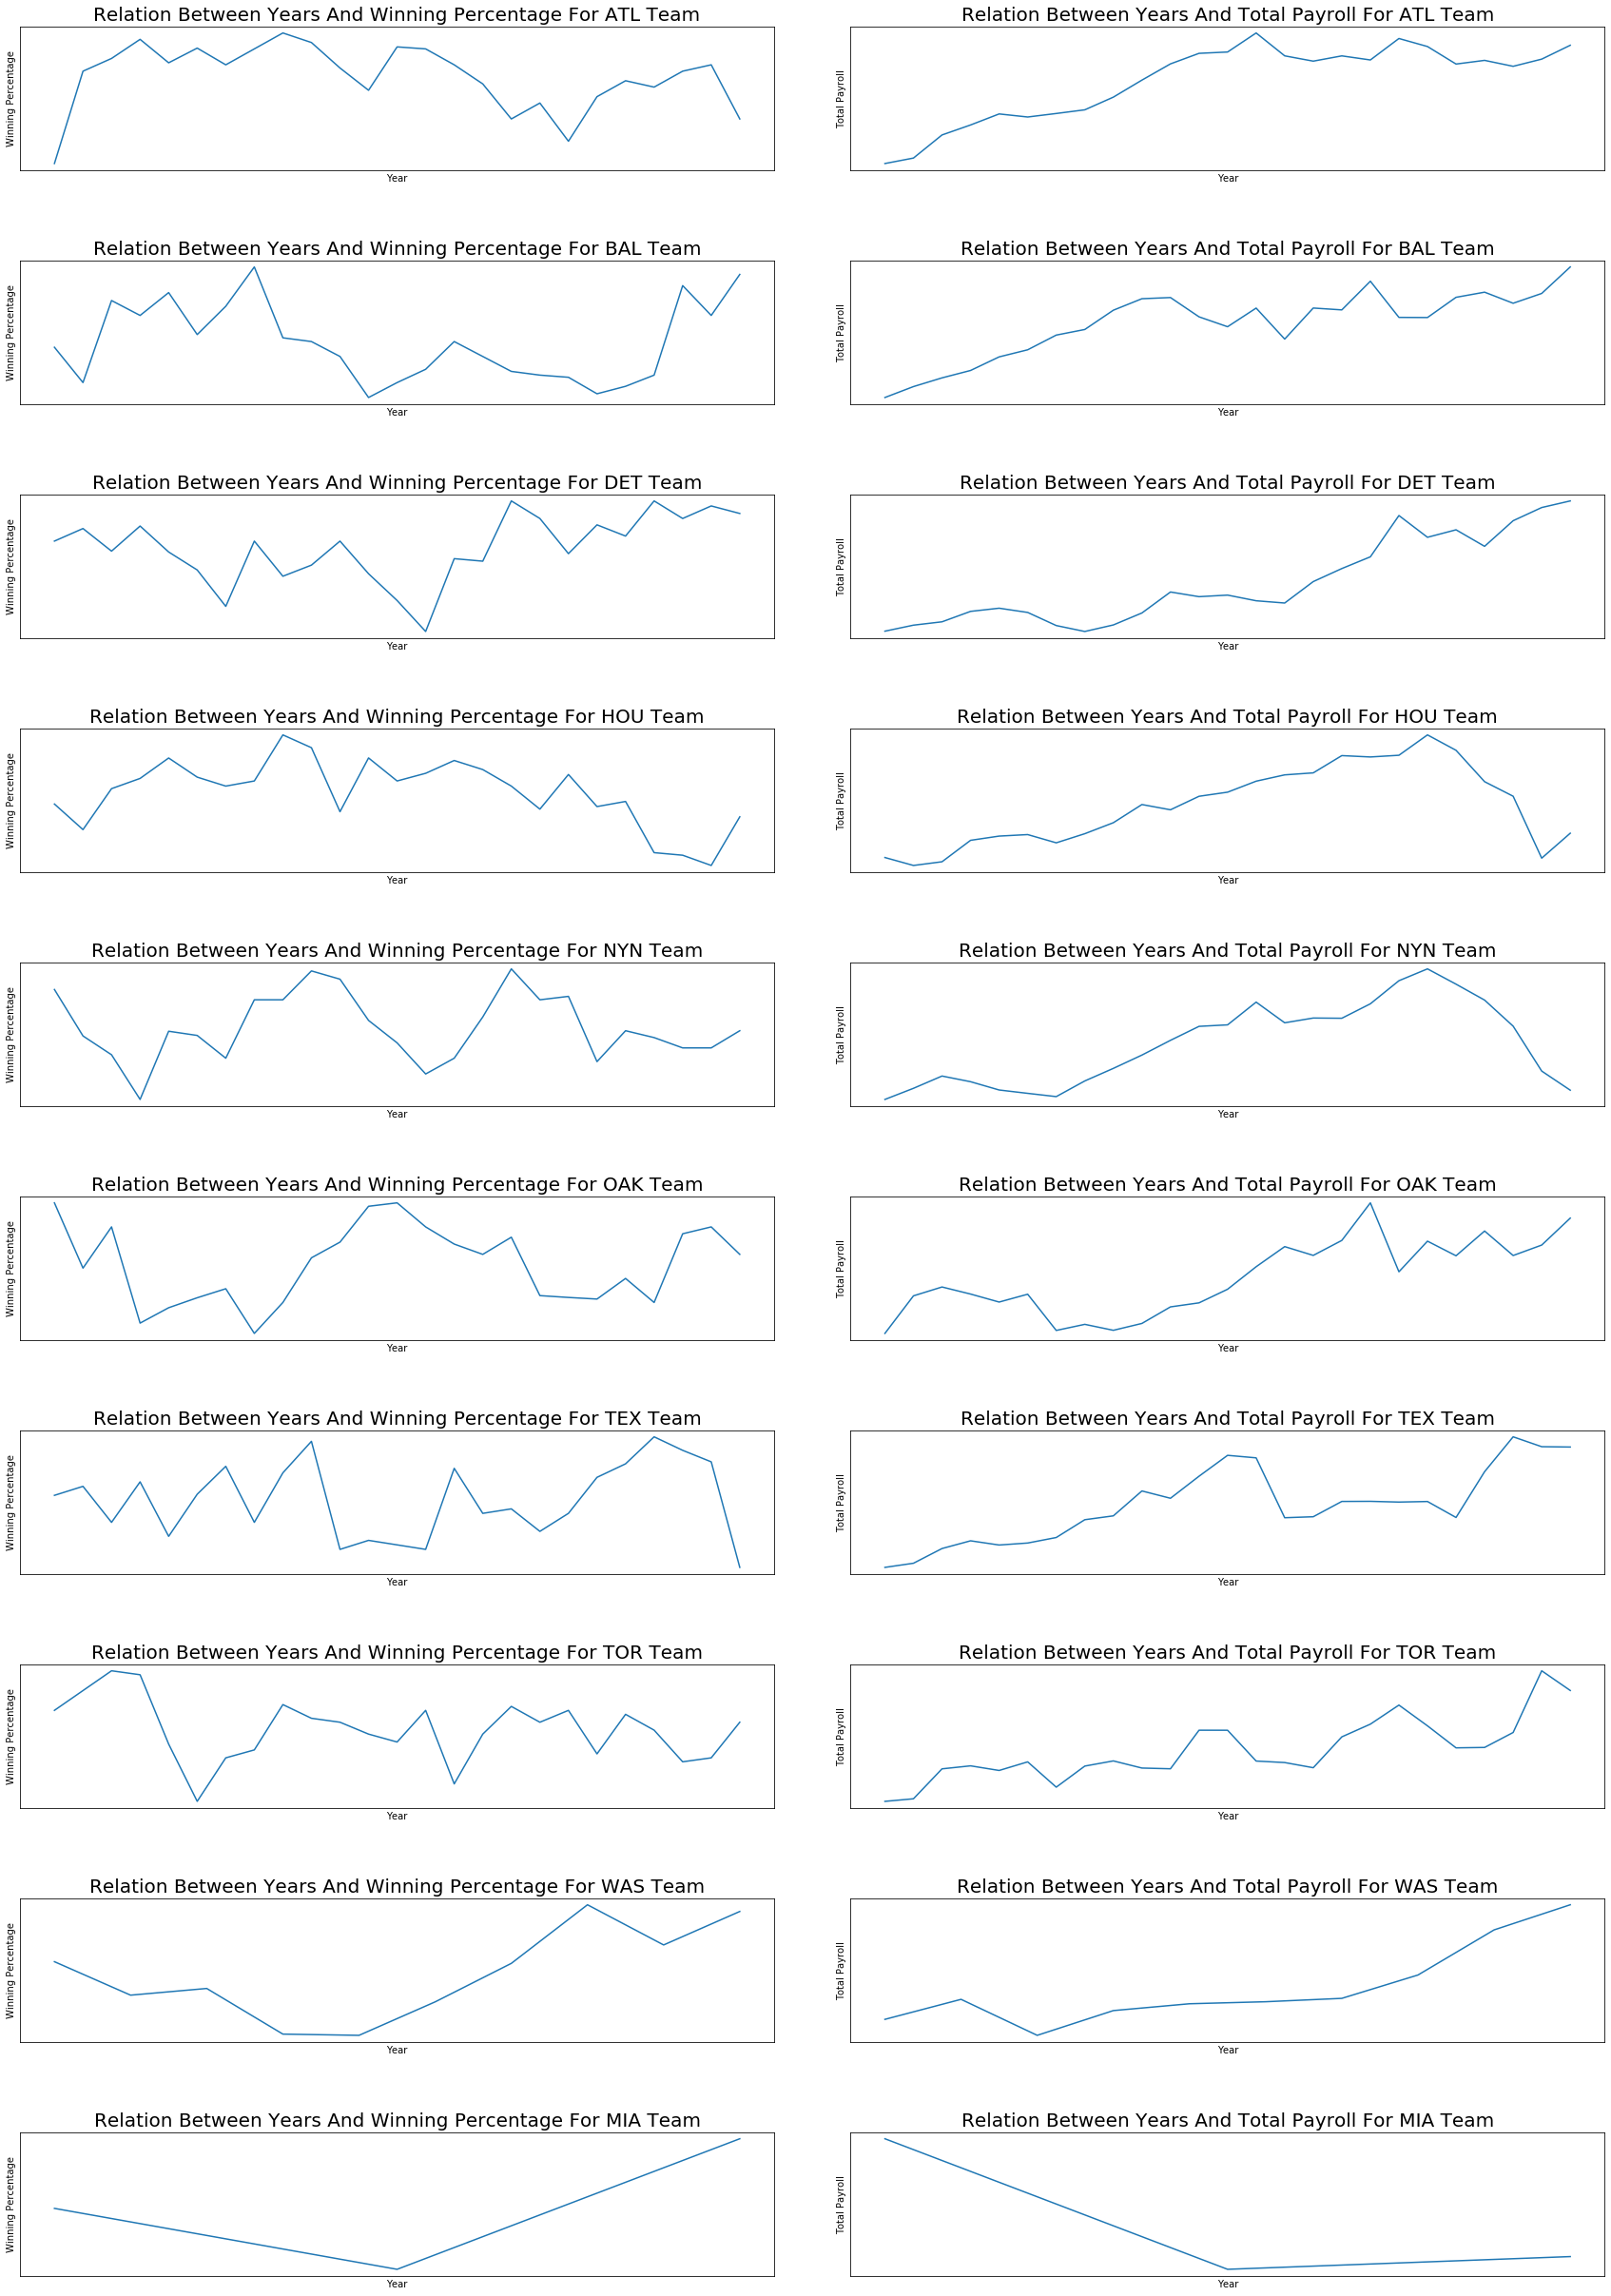

In [11]:
plt.figure(figsize=(25, 35))
i = 0
j = 0
for X, Y1, Y2 in zip(xAxis, y1Axis, y2Axis):
    plt.subplot(10, 2, j+1)
    plt.plot(X,Y1)
    plt.xlabel("Year")
    plt.ylabel("Winning Percentage")
    plt.title('Relation Between Years And Winning Percentage For {} Team'.format(TeamIDNames[i]), fontsize= 20)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(10, 2, j+2)
    plt.plot(X,Y2)
    plt.xlabel("Year")
    plt.ylabel("Total Payroll")
    plt.title('Relation Between Years And Total Payroll For {} Team'.format(TeamIDNames[i]), fontsize= 20)
    plt.xticks([])
    plt.yticks([])
        
    i = i + 1
    j = j + 2
    
plt.tight_layout(pad=6, h_pad=6, w_pad=6)
plt.show()


In [12]:
print('Mean for {} Team Is: {}.\nMeadian for {} Team Is: {}.\nStandard Deviation for {} Team Is: {}.\n'.format(TeamIDNames[0], np.mean(y1Axis[0]), TeamIDNames[0], np.median(y1Axis[0]), TeamIDNames[0], np.std(y1Axis[0])))

print('Mean for {} Team Is: {}.\nMeadian for {} Team Is: {}.\nStandard Deviation for {} Team Is: {}.\n'.format(TeamIDNames[0], np.mean(y2Axis[0]), TeamIDNames[0], np.median(y2Axis[0]), TeamIDNames[0], np.std(y2Axis[0])))


Mean for ATL Team Is: 56.950837238022594.
Meadian for ATL Team Is: 58.64197530864198.
Standard Deviation for ATL Team Is: 6.196257868769697.

Mean for ATL Team Is: 72426077.2.
Meadian for ATL Team Is: 84537836.0.
Standard Deviation for ATL Team Is: 25938079.360691246.



In [13]:
print('Mean for {} Team Is: {}.\nMeadian for {} Team Is: {}.\nStandard Deviation for {} Team Is: {}.\n'.format(TeamIDNames[5], np.mean(y1Axis[5]), TeamIDNames[5], np.median(y1Axis[5]), TeamIDNames[5], np.std(y1Axis[5])))

print('Mean for {} Team Is: {}.\nMeadian for {} Team Is: {}.\nStandard Deviation for {} Team Is: {}.\n'.format(TeamIDNames[5], np.mean(y2Axis[5]), TeamIDNames[5], np.median(y2Axis[5]), TeamIDNames[5], np.std(y2Axis[5])))


Mean for OAK Team Is: 52.515549138546845.
Meadian for OAK Team Is: 53.70370370370371.
Standard Deviation for OAK Team Is: 6.834211738369007.

Mean for OAK Team Is: 45229300.68.
Meadian for OAK Team Is: 41035000.0.
Standard Deviation for OAK Team Is: 16750180.796127742.



In [14]:
print('Mean for {} Team Is: {}.\nMeadian for {} Team Is: {}.\nStandard Deviation for {} Team Is: {}.\n'.format(TeamIDNames[9], np.mean(y1Axis[9]), TeamIDNames[9], np.median(y1Axis[9]), TeamIDNames[9], np.std(y1Axis[9])))

print('Mean for {} Team Is: {}.\nMeadian for {} Team Is: {}.\nStandard Deviation for {} Team Is: {}.\n'.format(TeamIDNames[9], np.mean(y2Axis[9]), TeamIDNames[9], np.median(y2Axis[9]), TeamIDNames[9], np.std(y2Axis[9])))


Mean for MIA Team Is: 42.79835390946502.
Meadian for MIA Team Is: 42.592592592592595.
Standard Deviation for MIA Team Is: 3.782875784125566.

Mean for MIA Team Is: 64505600.0.
Meadian for MIA Team Is: 41836900.0.
Standard Deviation for MIA Team Is: 38030297.90022687.



**There is a direct relationship, as the rate of winning over the years increases, the total payroll increases.**

## 2- Correlation Between Payroll And Winning Percentage

* In this part I will plot data between (`Years`, `Avarage Winning Percentage`) AND (`Years`, `Avarage Total Payroll`).

In [15]:
YearPeriods = [1994, 1999, 2004, 2009, 2014]
AvarageWinningPercentage = []
AvarageTotalPayroll = []
startTime = 5
for i in range(5):
    tempWin = []
    tempPayroll = []
    for key in PartOneDict:
        DictWinList = []
        DictPayList = []
        temp = []
        temp = PartOneDict[key]
        for item in temp:
            DictWinList.append(item[1])
            DictPayList.append(item[2])
        tempWin.append(np.mean(DictWinList[startTime:startTime+5]))
        tempPayroll.append(np.mean(DictPayList[startTime:startTime+5]))    
    AvarageWinningPercentage.append(tempWin)
    AvarageTotalPayroll.append(tempPayroll)
    startTime = startTime + 5

YearsWinning = []
for i in range(len(AvarageWinningPercentage)):
    tempY = []
    for j in range(len(AvarageWinningPercentage[i])):
        tempY.append(YearPeriods[i])
    YearsWinning.append(tempY)
    
YearsPayroll = []
for i in range(len(AvarageTotalPayroll)):
    tempY = []
    for j in range(len(AvarageTotalPayroll[i])):
        tempY.append(YearPeriods[i])
    YearsPayroll.append(tempY)


C:\Users\Islam\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Islam\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


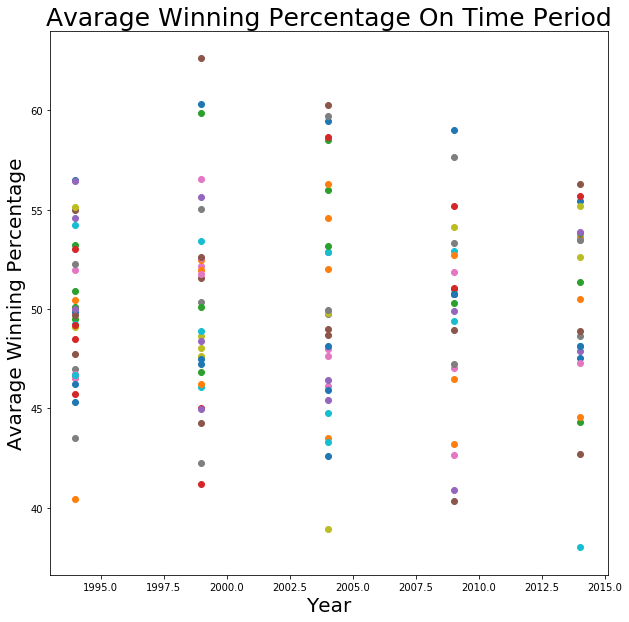

In [16]:
plt.figure(figsize=(10, 10))
for i in range(5):
    for j in range(len(AvarageWinningPercentage[i])):
        plt.scatter(YearsWinning[i][j], AvarageWinningPercentage[i][j])
        plt.xlabel("Year", fontsize= 20)
        plt.ylabel("Avarage Winning Percentage", fontsize= 20)
        plt.title("Avarage Winning Percentage On Time Period", fontsize= 25)


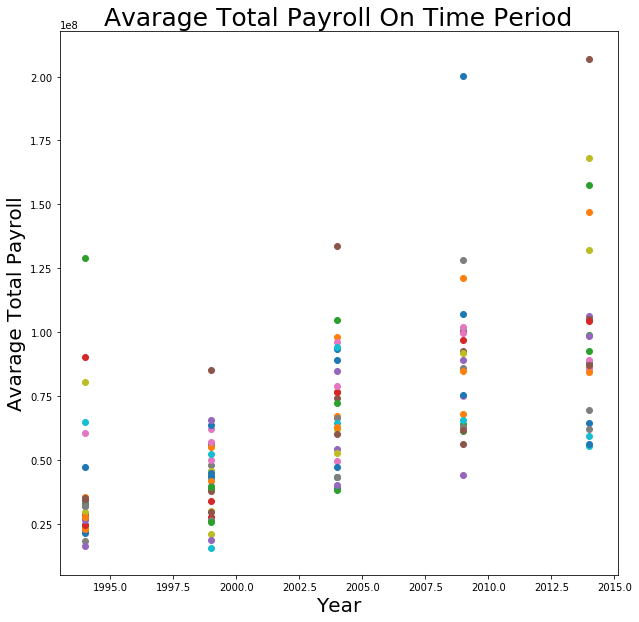

In [17]:
plt.figure(figsize=(10, 10))
for i in range(5):
    for j in range(len(AvarageTotalPayroll[i])):
        plt.scatter(YearsWinning[i][j], AvarageTotalPayroll[i][j])
        plt.xlabel("Year", fontsize= 20)
        plt.ylabel("Avarage Total Payroll", fontsize= 20)
        plt.title("Avarage Total Payroll On Time Period", fontsize= 25)


# PART THREE: Data Transformations

## 1- Standardizing across years 

at this part i should plot line of regression data between `Winning Percentage` and `Year`

In [18]:
payroll = []
payrollLine = []
winning = []
YearsList = list(range(1990, 2015))
CounterYear = 0
for key in PartOneDict:
    TeamPayList = []
    TeamPayListLine = []
    TeamWinList = []
    temp = []
    temp = PartOneDict[key]
    for item in temp:
        ExistBool = False
        for i in range(len(YearsList)):
            if(YearsList[i] == item[0] and item[0] >= 1990):
                TeamPayList.append(item[2])
                TeamPayListLine.append(item[2])
                TeamWinList.append(item[1])
                ExistBool =True
                break
        if(ExistBool == False and item[0] >= 1990):
            TeamPayList.append(np.nan)
            TeamWinList.append(np.nan)
    payroll.append(TeamPayList)
    payrollLine.append(TeamPayListLine)
    winning.append(TeamWinList)
    

In [19]:
StartYears = []
# INDEX       =   26        27    28      29    ...    ...                  34
StartYearsKey = ['COL', 'FLO', 'ANA', 'ARI', 'MIL', 'TBA', 'LAA', 'WAS', 'MIA']
for element in StartYearsKey:
    temp = []
    temp = PartOneDict[element]
    StartYears.append(temp[0][0])

for i in range(26,35):
    temp = []
    temp = PartOneDict[StartYearsKey[i-26]]
    count = temp[0][0] - 1990
    for j in range(count):
        payroll[i].insert(0,np.nan)
        winning[i].insert(0,np.nan)

EndYears = []
#INDEX B1    =    4      14    15    28       29 
EndYearsKey = ['CAL', 'ML4', 'MON', 'FLO', 'ANA']
EndYearsIndex = [3, 13, 14, 27, 28]
for key in PartOneDict:
    temp = []
    temp = PartOneDict[key]
    EndYears.append(temp[-1][0])
    
for i in range(5):
    temp = []
    temp = PartOneDict[EndYearsKey[i]]
    count = 2014 - temp[-1][0]
    for j in range(count):
        payroll[EndYearsIndex[i]].append(np.nan)
        winning[EndYearsIndex[i]].append(np.nan)
        
payroll = np.array(payroll)
winning = np.array(winning)


In [20]:
StandardDeviationPayroll = []

for i in range(len(YearsList)):
    avgPayList = []
    for key in PartOneDict:
        temp = PartOneDict[key]
        for item in temp:
            if(YearsList[i] == item[0]):
                avgPayList.append(item[2])
                break
    StandardDeviationPayroll.append(np.std(avgPayList))
StandardDeviationPayroll = np.array(StandardDeviationPayroll)


In [21]:
AveragePayrollYear = []

for i in range(len(YearsList)):
    avgPayList = []
    for key in PartOneDict:
        temp = PartOneDict[key]
        for item in temp:
            if(YearsList[i] == item[0]):
                avgPayList.append(item[2])
                break
    AveragePayrollYear.append(np.mean(avgPayList))
AveragePayrollYear = np.array(AveragePayrollYear) 

In [22]:
StandardizedPayroll = []
CounterForYear = 0

for item in payroll:
    subtraction = np.array(item) - np.array(AveragePayrollYear)
    StandardizedPayroll.append( subtraction /  StandardDeviationPayroll)

**Now `Standardized Payroll` and `Winning Percentage` is ready to be used.**

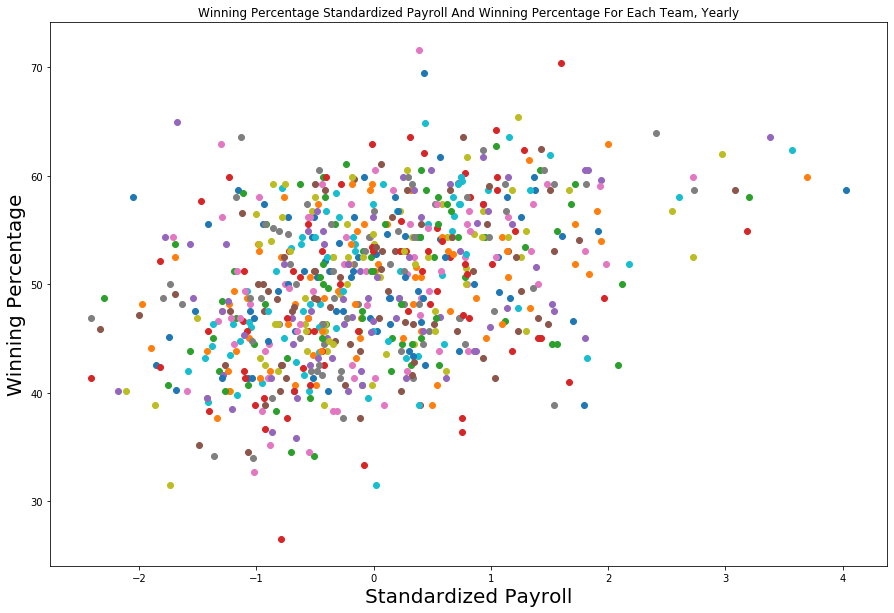

In [23]:
plt.figure(figsize=(15, 10))
for i in range(len(StandardizedPayroll)):
    for j in range(len(StandardizedPayroll[i])):
        plt.scatter(StandardizedPayroll[i][j], winning[i][j])

        plt.xlabel("Standardized Payroll", fontsize= 20)
        plt.ylabel("Winning Percentage", fontsize= 20)
        plt.title("Winning Percentage Standardized Payroll And Winning Percentage For Each Team, Yearly")


## 2- Expected Wins

at this part i should plot line of regression data between `Winning Percentage` and `Year`

In [24]:
StandardizedPayrollLine = []
ExpectedWinningPercentage = []

for item in StandardizedPayroll:
    StandardizedPayrollLine.append( (np.nan_to_num(item) ) )
    ExpectedWinningPercentage.append( ((np.nan_to_num(item)* 2.5) + 50 ) )
    

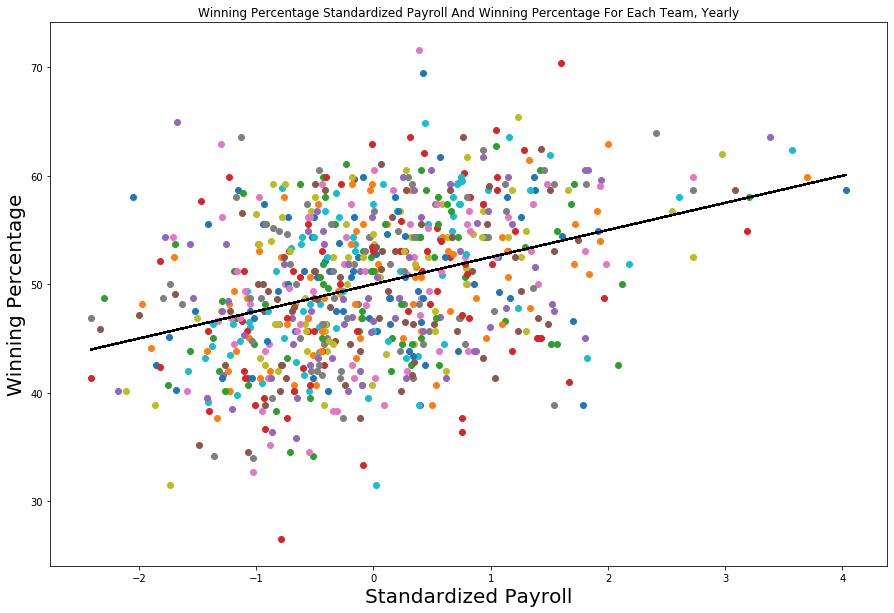

In [25]:
plt.figure(figsize=(15, 10))
for i in range(len(StandardizedPayroll)):
    for j in range(len(StandardizedPayroll[i])):
        plt.scatter(StandardizedPayroll[i][j], winning[i][j])                                   
        plt.xlabel("Standardized Payroll", fontsize= 20)
        plt.ylabel("Winning Percentage", fontsize= 20)
        plt.title("Winning Percentage Standardized Payroll And Winning Percentage For Each Team, Yearly")
        plt.plot(StandardizedPayrollLine , ExpectedWinningPercentage, color='black')

## 3- Spending Efficiency

* at this part i should plot data between `Efficiency` and `Year`

In [26]:
Efficiency = []
Efficiency = winning - ExpectedWinningPercentage
Efficiency = Efficiency.reshape(25,35)


In [27]:
FinalYears = []
for item in YearsList:
    temp = []
    for i in range(35):
        temp.append(item)
    FinalYears.append(temp)
FinalYears = np.array(FinalYears)


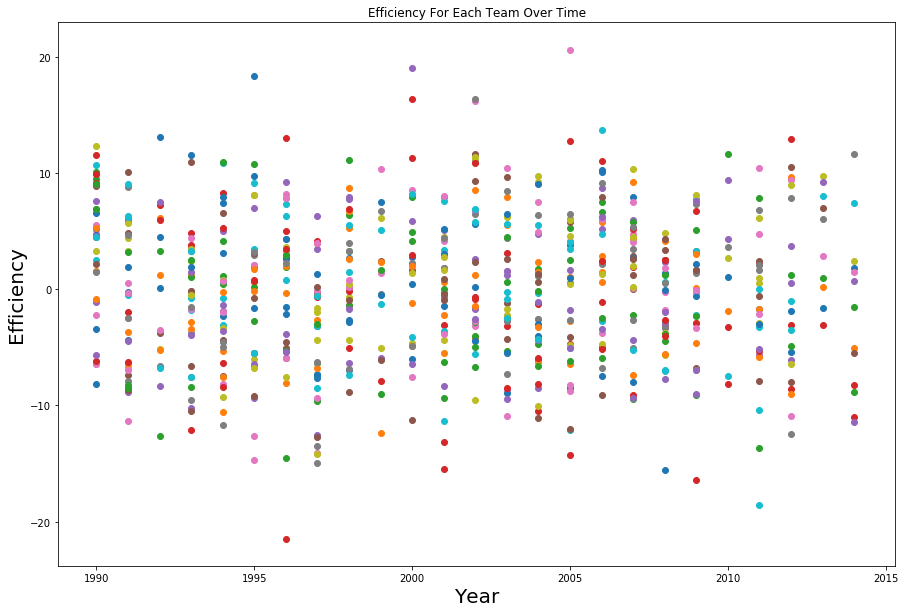

In [28]:
plt.figure(figsize=(15, 10))

for i in range(len(Efficiency)):
    for j in range(len(Efficiency[i])):
        plt.scatter(FinalYears[i][j], Efficiency[i][j])
        plt.xlabel("Year", fontsize= 20)
        plt.ylabel("Efficiency", fontsize= 20)
        plt.title("Efficiency For Each Team Over Time")


**`The OAK team has made remarkable progress in the last five years.`**

In [41]:
StandardizedPayroll[0]

array([-0.68049015, -0.76548655,  0.40598848,  1.04084351,  1.93986575,
        1.42862182,  1.47871719,  0.93707081,  1.22842304,  1.15416901,
        1.37726271,  1.09419815,  1.0462965 ,  1.28177684,  0.65567779,
        0.40178686,  0.40269205,  0.14201976,  0.34628899,  0.23738064,
       -0.16780335, -0.14489731, -0.41239306, -0.27659766, -0.04875766])

In [30]:
winning

array([[40.12345679, 58.02469136, 60.49382716, 64.19753086, 59.64912281,
        62.5       , 59.25925926, 62.34567901, 65.43209877, 63.58024691,
        58.64197531, 54.32098765, 62.73291925, 62.34567901, 59.25925926,
        55.55555556, 48.7654321 , 51.85185185, 44.44444444, 53.08641975,
        56.17283951, 54.9382716 , 58.02469136, 59.25925926, 48.7654321 ],
       [47.20496894, 41.35802469, 54.9382716 , 52.4691358 , 56.25      ,
        49.30555556, 53.98773006, 60.49382716, 48.7654321 , 48.14814815,
        45.67901235, 38.88888889, 41.35802469, 43.55828221, 48.14814815,
        45.67901235, 43.20987654, 42.59259259, 42.23602484, 39.50617284,
        40.74074074, 42.59259259, 57.40740741, 52.4691358 , 59.25925926],
       [54.32098765, 51.85185185, 45.0617284 , 49.38271605, 46.95652174,
        59.72222222, 52.4691358 , 48.14814815, 56.79012346, 58.02469136,
        52.4691358 , 50.93167702, 57.40740741, 58.64197531, 60.49382716,
        58.64197531, 53.08641975, 59.25925926, 58

In [40]:
AveragePayrollYear

array([1.70723536e+07, 2.35787853e+07, 3.09824355e+07, 3.22050048e+07,
       3.31370102e+07, 3.39810488e+07, 3.41779839e+07, 4.02602102e+07,
       4.26094290e+07, 4.98076250e+07, 5.55378367e+07, 6.53554438e+07,
       6.74692507e+07, 7.09420709e+07, 6.90221981e+07, 7.29571133e+07,
       7.73824206e+07, 8.25562996e+07, 8.94952890e+07, 8.88242331e+07,
       9.07119955e+07, 9.28168430e+07, 9.77580397e+07, 1.01150855e+08,
       9.98000155e+07])

In [38]:
np.shape(payroll)

(35, 25)

In [43]:
StandardDeviationPayroll

array([ 3698587.79207407,  6760778.93207733,  8972908.50846348,
        9066120.03199752,  8375065.5031927 ,  9277750.03641249,
       10495932.64702198, 12825380.57652641, 15122291.17317703,
       20215735.17084919, 21056258.16330836, 24292421.15688925,
       24277168.27452879, 27541140.61884869, 32272409.18179336,
       33600373.71004868, 31722641.39667846, 33337146.73035162,
       37166627.75478925, 33288025.31078482, 37474396.81423688,
       40126010.0572179 , 36198712.02446823, 48009551.83068606,
       44936846.59579254])